# US Presidential Election: Hypothesis Test & Predictive Modeling

This project builds on the results of the previous one *US Presidential Election: Data Cleaning & EDA* to create 
a predictive model. First, correlation of various demographics information with party vote shares are evaluated. Then,  difference of vote shares between election cycles are statistically tested using approperiate test method. Finally,   

In [32]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [33]:
data = pd.read_csv('data_clean.csv')
data.head()

,Unnamed: 0,State,Fips,County,Precincts,Votes,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,...,Teen.births,Children.in.single.parent.households,Adult.smoking,Adult.obesity,Diabetes,Sexually.transmitted.infections,Uninsured,Unemployment,Violent.crime,Injury.deaths
0,0,Arkansas,5043,"Drew County, Arkansas",17.0,6590.0,19.4,80.6,19.4,5.7,...,47.7,0.429,0.181,0.323,0.126,747.3,0.197,0.108,449.02,82.0
1,1,Arkansas,5087,"Madison County, Arkansas",20.0,6829.0,24.2,75.8,13.4,4.1,...,49.0,0.179,0.304,0.328,0.135,247.2,0.239,0.053,245.83,96.8
2,2,Georgia,13159,"Jasper County, Georgia",3.0,6016.0,21.7,78.3,13.3,5.6,...,54.1,0.381,0.210,0.298,0.118,324.1,0.239,0.096,205.60,71.6
3,3,Colorado,8037,"Eagle County, Colorado",30.0,22611.0,12.8,87.2,45.9,11.7,...,41.3,0.204,0.095,0.132,0.036,190.9,0.230,0.081,123.88,42.9
4,4,Georgia,13091,"Dodge County, Georgia",16.0,6995.0,23.1,76.9,13.8,4.8,...,64.0,0.453,0.189,0.358,0.153,497.9,0.208,0.115,477.48,79.4


In [34]:
vote = pd.read_csv('votes_clean.csv')
vote.head()

,Unnamed: 0,Democrats_12(Votes),Republicans_12(Votes),Democrats_16(Votes),Republicans_16(Votes),Democrats12_VoteShare,Republicans12_VoteShare,Democrats16_VoteShare,Republicans16_VoteShare
0,0,2630.0,3887.0,2364.0,3967.0,40.36,59.64,37.34,62.66
1,1,2099.0,4263.0,1587.0,4917.0,32.99,67.01,24.40,75.60
2,2,1845.0,4136.0,1544.0,4353.0,30.85,69.15,26.18,73.82
3,3,12792.0,9411.0,12652.0,8153.0,57.61,42.39,60.81,39.19
4,4,2442.0,5214.0,1836.0,5021.0,31.90,68.10,26.78,73.22


In [35]:
data_vote = pd.merge(data, vote, on = 'Unnamed: 0')
data_vote.head(5)

,Unnamed: 0,State,Fips,County,Precincts,Votes,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,...,Violent.crime,Injury.deaths,Democrats_12(Votes),Republicans_12(Votes),Democrats_16(Votes),Republicans_16(Votes),Democrats12_VoteShare,Republicans12_VoteShare,Democrats16_VoteShare,Republicans16_VoteShare
0,0,Arkansas,5043,"Drew County, Arkansas",17.0,6590.0,19.4,80.6,19.4,5.7,...,449.02,82.0,2630.0,3887.0,2364.0,3967.0,40.36,59.64,37.34,62.66
1,1,Arkansas,5087,"Madison County, Arkansas",20.0,6829.0,24.2,75.8,13.4,4.1,...,245.83,96.8,2099.0,4263.0,1587.0,4917.0,32.99,67.01,24.40,75.60
2,2,Georgia,13159,"Jasper County, Georgia",3.0,6016.0,21.7,78.3,13.3,5.6,...,205.60,71.6,1845.0,4136.0,1544.0,4353.0,30.85,69.15,26.18,73.82
3,3,Colorado,8037,"Eagle County, Colorado",30.0,22611.0,12.8,87.2,45.9,11.7,...,123.88,42.9,12792.0,9411.0,12652.0,8153.0,57.61,42.39,60.81,39.19
4,4,Georgia,13091,"Dodge County, Georgia",16.0,6995.0,23.1,76.9,13.8,4.8,...,477.48,79.4,2442.0,5214.0,1836.0,5021.0,31.90,68.10,26.78,73.22


In [36]:
data_vote['Republicans12_VoteShare']
data_vote.iloc[:,3]
#stats.pearsonr(data_vote.iloc[:,1], data_vote['Republicans12_VoteShare'])

0           Drew County, Arkansas
1        Madison County, Arkansas
2          Jasper County, Georgia
3          Eagle County, Colorado
4           Dodge County, Georgia
                  ...            
3136          Butler County, Ohio
3137           Logan County, Ohio
3138          Lorain County, Ohio
3139    Cherokee County, Oklahoma
3140    Cimarron County, Oklahoma
Name: County, Length: 3141, dtype: object

In [37]:
stats.pearsonr(data_vote.iloc[:,0], data_vote['Republicans12_VoteShare'])[0]

0.0053615713045454295

In [38]:
data=[]
for i in range(4,data_vote.shape[1]):  
    data.append([data_vote.columns[i], 
    np.abs(stats.pearsonr(data_vote.iloc[:,i], data_vote['Republicans12_VoteShare'])[0]),
    stats.pearsonr(data_vote.iloc[:,i], data_vote['Republicans12_VoteShare'])[0], 
    stats.pearsonr(data_vote.iloc[:,i], data_vote['Republicans12_VoteShare'])[1]]) 
corr12_df = pd.DataFrame(data,columns = ['Demographic info', 'abs_corr12', 'corr12', 'p_value12'])
corr12_df.sort_values(by = 'abs_corr12', ascending = False, inplace = True)
corr12_df.reset_index(drop=True)

,Demographic info,abs_corr12,corr12,p_value12
0,Republicans12_VoteShare,1.000000,1.000000,0.000000e+00
1,Democrats12_VoteShare,1.000000,-1.000000,0.000000e+00
2,Republicans16_VoteShare,0.943883,0.943883,0.000000e+00
3,Democrats16_VoteShare,0.943883,-0.943883,0.000000e+00
4,White (Not Latino) Population,0.437955,0.437955,2.284088e-147
5,Children.in.single.parent.households,0.427325,-0.427325,1.210057e-139
6,Sexually.transmitted.infections,0.414017,-0.414017,2.344544e-130
7,African American Population,0.392567,-0.392567,3.012613e-116
8,Graduate Degree,0.369278,-0.369278,4.517001e-102
9,Construction.extraction.maintenance.and.repair...,0.345326,0.345326,1.149040e-88


In [39]:
data=[]
for i in range(4,data_vote.shape[1]):  
    data.append([data_vote.columns[i], 
    np.abs(stats.pearsonr(data_vote.iloc[:,i], data_vote['Republicans16_VoteShare'])[0]),
    stats.pearsonr(data_vote.iloc[:,i], data_vote['Republicans16_VoteShare'])[0], 
    stats.pearsonr(data_vote.iloc[:,i], data_vote['Republicans16_VoteShare'])[1]]) 
corr12_df = pd.DataFrame(data,columns = ['Demographic info', 'abs_corr16', 'corr16', 'p_value16'])
corr12_df.sort_values(by = 'abs_corr16', ascending = False, inplace = True)
corr12_df.reset_index(drop=True)

,Demographic info,abs_corr16,corr16,p_value16
0,Republicans16_VoteShare,1.000000,1.000000,0.000000e+00
1,Democrats16_VoteShare,1.000000,-1.000000,0.000000e+00
2,Republicans12_VoteShare,0.943883,0.943883,0.000000e+00
3,Democrats12_VoteShare,0.943883,-0.943883,0.000000e+00
4,White (Not Latino) Population,0.552828,0.552828,6.294776e-251
5,Graduate Degree,0.517054,-0.517054,2.508930e-214
6,Sexually.transmitted.infections,0.468603,-0.468603,3.045264e-171
7,At Least Bachelors's Degree,0.464169,-0.464169,1.233182e-167
8,African American Population,0.461468,-0.461468,1.829538e-165
9,SIRE_homogeneity,0.438292,0.438292,1.285906e-147


In [84]:
lm = sm.OLS(data_vote['Republicans16_VoteShare'], data_vote['White (Not Latino) Population']).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Republicans16_VoteShare   R-squared (uncentered):                   0.950
Model:                                 OLS   Adj. R-squared (uncentered):              0.950
Method:                      Least Squares   F-statistic:                          5.985e+04
Date:                     Fri, 31 Jan 2020   Prob (F-statistic):                        0.00
Time:                             19:08:58   Log-Likelihood:                         -13030.
No. Observations:                     3141   AIC:                                  2.606e+04
Df Residuals:                         3140   BIC:                                  2.607e+04
Df Model:                                1                                                  
Covariance Type:                 nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
White (Not Latino) Population     0.8241      0.003    244.646      0.000       0.818       0.831
==============================================================================
Omnibus:                       46.356   Durbin-Watson:                   1.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.814
Skew:                           0.023   Prob(JB):                     2.32e-19
Kurtosis:                       3.808   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
lm = sm.OLS(data_vote['Republicans16_VoteShare'], data_vote[['White (Not Latino) Population', 'Graduate Degree']]).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Republicans16_VoteShare   R-squared (uncentered):                   0.954
Model:                                 OLS   Adj. R-squared (uncentered):              0.954
Method:                      Least Squares   F-statistic:                          3.263e+04
Date:                     Fri, 31 Jan 2020   Prob (F-statistic):                        0.00
Time:                             19:17:06   Log-Likelihood:                         -12900.
No. Observations:                     3141   AIC:                                  2.580e+04
Df Residuals:                         3139   BIC:                                  2.582e+04
Df Model:                                2                                                  
Covariance Type:                 nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
White (Not Latino) Population     0.9031      0.006    156.077      0.000       0.892       0.914
Graduate Degree                  -1.0286      0.063    -16.447      0.000      -1.151      -0.906
==============================================================================
Omnibus:                      110.239   Durbin-Watson:                   1.163
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.607
Skew:                           0.357   Prob(JB):                     2.68e-34
Kurtosis:                       3.819   Cond. No.                         19.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
X_base = sm.add_constant(data_vote.drop(['Unnamed: 0', 'State', 'Fips', 'County', 
                                          'Adults 65 and Older Living in Poverty',           
                                          'Democrats_12(Votes)', 'Republicans_12(Votes)', 
                                          'Democrats_16(Votes)', 'Republicans_16(Votes)',                                                                                  
                                          'Democrats12_VoteShare', 'Republicans12_VoteShare',                                                                                 
                                          'Democrats16_VoteShare', 'Republicans16_VoteShare'], axis = 1))
lm = sm.OLS(data_vote['Republicans16_VoteShare'], X_base).fit()
lm.summary()

C:\Users\arali\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Republicans16_VoteShare   R-squared:                       0.800
Model:                                 OLS   Adj. R-squared:                  0.797
Method:                      Least Squares   F-statistic:                     317.5
Date:                     Fri, 31 Jan 2020   Prob (F-statistic):               0.00
Time:                             09:56:43   Log-Likelihood:                -10641.
No. Observations:                     3141   AIC:                         2.136e+04
Df Residuals:                         3101   BIC:                         2.160e+04
Df Model:                               39                                         
Covariance Type:                 nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                       -182.2742    367.339     -0.496      0.620    -902.526     537.977
Precincts                                                     -0.0011      0.002     -0.548      0.584      -0.005       0.003
Votes                                                      -3.219e-05   5.42e-06     -5.934      0.000   -4.28e-05   -2.16e-05
Less Than High School Diploma                                 -0.0022      0.078     -0.029      0.977      -0.155       0.150
At Least High School Diploma                                  -0.0018      0.072     -0.025      0.980      -0.142       0.139
At Least Bachelors's Degree                                   -0.5692      0.060     -9.551      0.000      -0.686      -0.452
Graduate Degree                                               -0.7526      0.101     -7.448      0.000      -0.951      -0.554
School Enrollment                                              0.0256      0.031      0.822      0.411      -0.035       0.087
Median Earnings 2010                                       -3.128e-05   4.93e-05     -0.634      0.526      -0.000    6.54e-05
White (Not Latino) Population                                  1.2640      2.659      0.475      0.635      -3.949       6.477
African American Population                                    0.4974      2.659      0.187      0.852      -4.715       5.710
Native American Population                                     0.7025      2.659      0.264      0.792      -4.511       5.916
Asian American Population                                      0.6488      2.660      0.244      0.807      -4.566       5.864
Other Race or Races                                            0.6138      2.661      0.231      0.818      -4.604       5.832
Latino Population                                              0.6334      2.659      0.238      0.812      -4.581       5.847
Children Under 6 Living in Poverty                            -0.0116      0.025     -0.465      0.642      -0.060       0.037
Total Population                                            7.952e-06   2.15e-06      3.705      0.000    3.74e-06    1.22e-05
Preschool.Enrollment.Ratio.enrolled.ages.3.and.4               0.0014      0.010      0.141      0.888      -0.018       0.021
Poverty.Rate.below.federal.poverty.threshold                  -0.4579      0.077     -5.984      0.000      -0.608      -0.308
Gini.Coefficient                                              12.0788      5.331      2.266      0.024       1.627      22.531
Child.Poverty.living.in.families.below.the.poverty.line        0.1186      0.051      2.343      0.019     

In [41]:
summary = lm.summary()
coef_df = pd.DataFrame(data=summary.tables[1].data[1:], columns = summary.tables[1].data[0])
coef_df['coef'] = coef_df['coef'].astype(float)
coef_df['abs_coef'] = np.abs(coef_df['coef']) 
coef_by_mag = coef_df.sort_values(by = 'abs_coef', ascending = False)
coef_by_mag

,,coef,std err,t,P>|t|,[0.025,0.975],abs_coef
0,const,-182.274200,367.339,-0.496,0.620,-902.526,537.977,182.274200
34,Diabetes,86.421000,11.880,7.274,0.000,63.127,109.715,86.421000
36,Uninsured,81.820500,4.224,19.372,0.000,73.539,90.102,81.820500
37,Unemployment,-77.182800,6.272,-12.307,0.000,-89.480,-64.886,77.182800
29,Low.birthweight,57.012300,10.826,5.266,0.000,35.786,78.239,57.012300
31,Children.in.single.parent.households,-26.972000,2.387,-11.300,0.000,-31.652,-22.292,26.972000
27,SIRE_homogeneity,-22.117900,1.647,-13.430,0.000,-25.347,-18.889,22.117900
19,Gini.Coefficient,12.078800,5.331,2.266,0.024,1.627,22.531,12.078800
33,Adult.obesity,3.508200,5.734,0.612,0.541,-7.735,14.751,3.508200
21,Management.professional.and.related.occupations,1.910700,2.549,0.750,0.454,-3.087,6.908,1.910700


In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series = pd.Series([variance_inflation_factor(X_base.values, i) for i in range(X_base.shape[1])], index=X_base.columns)
vif_series.sort_values(ascending = False, inplace = True)
vif_series

const                                                         8.154579e+06
White (Not Latino) Population                                 1.644982e+05
African American Population                                   8.836001e+04
Latino Population                                             7.170010e+04
Native American Population                                    2.350410e+04
Management.professional.and.related.occupations               1.624021e+04
Production.transportation.and.material.moving.occupations     1.467264e+04
Service.occupations                                           4.848999e+03
Sales.and.office.occupations                                  4.762553e+03
Construction.extraction.maintenance.and.repair.occupations    4.458438e+03
Farming.fishing.and.forestry.occupations                      2.643993e+03
Asian American Population                                     2.534778e+03
Other Race or Races                                           1.546111e+03
Total Population         

In [89]:
vif_series.index[0]

'const'

In [56]:
X_white = X_base.drop('White (Not Latino) Population', axis = 1)
lm = sm.OLS(data_vote['Republicans16_VoteShare'], X_white).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Republicans16_VoteShare   R-squared:                       0.800
Model:                                 OLS   Adj. R-squared:                  0.797
Method:                      Least Squares   F-statistic:                     326.0
Date:                     Fri, 31 Jan 2020   Prob (F-statistic):               0.00
Time:                             15:40:58   Log-Likelihood:                -10642.
No. Observations:                     3141   AIC:                         2.136e+04
Df Residuals:                         3102   BIC:                         2.160e+04
Df Model:                               38                                         
Covariance Type:                 nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                        -56.5559    254.928     -0.222      0.824    -556.401     443.289
Precincts                                                     -0.0011      0.002     -0.547      0.584      -0.005       0.003
Votes                                                      -3.217e-05   5.42e-06     -5.931      0.000   -4.28e-05   -2.15e-05
Less Than High School Diploma                                 -0.0018      0.078     -0.023      0.982      -0.154       0.151
At Least High School Diploma                                  -0.0014      0.072     -0.020      0.984      -0.142       0.139
At Least Bachelors's Degree                                   -0.5683      0.060     -9.542      0.000      -0.685      -0.452
Graduate Degree                                               -0.7540      0.101     -7.467      0.000      -0.952      -0.556
School Enrollment                                              0.0258      0.031      0.828      0.408      -0.035       0.087
Median Earnings 2010                                       -3.187e-05   4.93e-05     -0.647      0.518      -0.000    6.47e-05
African American Population                                   -0.7664      0.026    -29.569      0.000      -0.817      -0.716
Native American Population                                    -0.5615      0.028    -19.822      0.000      -0.617      -0.506
Asian American Population                                     -0.6151      0.078     -7.908      0.000      -0.768      -0.463
Other Race or Races                                           -0.6505      0.091     -7.160      0.000      -0.829      -0.472
Latino Population                                             -0.6307      0.019    -33.464      0.000      -0.668      -0.594
Children Under 6 Living in Poverty                            -0.0113      0.025     -0.455      0.649      -0.060       0.037
Total Population                                            7.952e-06   2.15e-06      3.705      0.000    3.74e-06    1.22e-05
Preschool.Enrollment.Ratio.enrolled.ages.3.and.4               0.0014      0.010      0.144      0.886      -0.018       0.021
Poverty.Rate.below.federal.poverty.threshold                  -0.4582      0.077     -5.989      0.000      -0.608      -0.308
Gini.Coefficient                                              12.0490      5.330      2.261      0.024       1.599      22.499
Child.Poverty.living.in.families.below.the.poverty.line        0.1183      0.051      2.337      0.020       0.019       0.217
Management.professional.and.related.occupations                1.9172      2.548      0.752      0.452     

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series = pd.Series([variance_inflation_factor(X_white.values, i) for i in range(X_white.shape[1])], index=X_white.columns)
vif_series.sort_values(ascending = False, inplace = True)
vif_series

const                                                         3.928365e+06
Management.professional.and.related.occupations               1.623973e+04
Production.transportation.and.material.moving.occupations     1.467220e+04
Service.occupations                                           4.848865e+03
Sales.and.office.occupations                                  4.762425e+03
Construction.extraction.maintenance.and.repair.occupations    4.458336e+03
Farming.fishing.and.forestry.occupations                      2.643930e+03
Total Population                                              2.694378e+01
Votes                                                         2.266231e+01
Less Than High School Diploma                                 1.973132e+01
At Least High School Diploma                                  1.759863e+01
At Least Bachelors's Degree                                   1.602807e+01
Poverty.Rate.below.federal.poverty.threshold                  1.442167e+01
Child.Poverty.living.in.f

In [71]:
X_2 = X_white.drop('Management.professional.and.related.occupations', axis = 1)
lm = sm.OLS(data_vote['Republicans16_VoteShare'], X_2).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Republicans16_VoteShare   R-squared:                       0.800
Model:                                 OLS   Adj. R-squared:                  0.797
Method:                      Least Squares   F-statistic:                     334.8
Date:                     Fri, 31 Jan 2020   Prob (F-statistic):               0.00
Time:                             16:33:49   Log-Likelihood:                -10642.
No. Observations:                     3141   AIC:                         2.136e+04
Df Residuals:                         3103   BIC:                         2.159e+04
Df Model:                               37                                         
Covariance Type:                 nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                        135.1308      8.298     16.285      0.000     118.861     151.401
Precincts                                                     -0.0011      0.002     -0.555      0.579      -0.005       0.003
Votes                                                       -3.22e-05   5.42e-06     -5.938      0.000   -4.28e-05   -2.16e-05
Less Than High School Diploma                                 -0.0021      0.078     -0.027      0.978      -0.155       0.150
At Least High School Diploma                                  -0.0020      0.072     -0.028      0.978      -0.142       0.138
At Least Bachelors's Degree                                   -0.5689      0.060     -9.553      0.000      -0.686      -0.452
Graduate Degree                                               -0.7537      0.101     -7.464      0.000      -0.952      -0.556
School Enrollment                                              0.0252      0.031      0.810      0.418      -0.036       0.086
Median Earnings 2010                                       -3.125e-05   4.93e-05     -0.634      0.526      -0.000    6.53e-05
African American Population                                   -0.7664      0.026    -29.570      0.000      -0.817      -0.716
Native American Population                                    -0.5613      0.028    -19.818      0.000      -0.617      -0.506
Asian American Population                                     -0.6144      0.078     -7.900      0.000      -0.767      -0.462
Other Race or Races                                           -0.6502      0.091     -7.157      0.000      -0.828      -0.472
Latino Population                                             -0.6306      0.019    -33.460      0.000      -0.668      -0.594
Children Under 6 Living in Poverty                            -0.0115      0.025     -0.463      0.644      -0.060       0.037
Total Population                                            7.976e-06   2.15e-06      3.717      0.000    3.77e-06    1.22e-05
Preschool.Enrollment.Ratio.enrolled.ages.3.and.4               0.0014      0.010      0.140      0.889      -0.018       0.021
Poverty.Rate.below.federal.poverty.threshold                  -0.4565      0.076     -5.970      0.000      -0.606      -0.307
Gini.Coefficient                                              12.2056      5.325      2.292      0.022       1.765      22.647
Child.Poverty.living.in.families.below.the.poverty.line        0.1173      0.051      2.318      0.021       0.018       0.216
Service.occupations                                           -0.5991      0.056    -10.688      0.000     

In [72]:
coefficient_table = lm.summary().tables[1]
coefficient_df = pd.DataFrame(data=coefficient_table.data[1:],
                              columns = coefficient_table.data[0])
coefficient_df['coef'] = coefficient_df['coef'].astype(float)
coefficient_df['P>|t|'] = coefficient_df['P>|t|'].astype(float)
coefficient_df[coefficient_df['P>|t|'] >= 0.05]

,,coef,std err,t,P>|t|,[0.025,0.975]
1,Precincts,-0.001100,0.002,-0.555,0.579,-0.005,0.003
3,Less Than High School Diploma,-0.002100,0.078,-0.027,0.978,-0.155,0.150
4,At Least High School Diploma,-0.002000,0.072,-0.028,0.978,-0.142,0.138
7,School Enrollment,0.025200,0.031,0.810,0.418,-0.036,0.086
8,Median Earnings 2010,-0.000031,4.93e-05,-0.634,0.526,-0.000,6.53e-05
14,Children Under 6 Living in Poverty,-0.011500,0.025,-0.463,0.644,-0.060,0.037
16,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,0.001400,0.010,0.140,0.889,-0.018,0.021
30,Adult.smoking,-0.640700,2.961,-0.216,0.829,-6.447,5.165
31,Adult.obesity,3.643000,5.731,0.636,0.525,-7.594,14.880
33,Sexually.transmitted.infections,-0.000700,0.001,-0.759,0.448,-0.003,0.001


In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series = pd.Series([variance_inflation_factor(X_2.values, i) for i in range(X_2.shape[1])], index=X_2.columns)
vif_series.sort_values(ascending = False, inplace = True)
vif_series

const                                                         4162.839835
Total Population                                                26.937565
Votes                                                           22.661028
Less Than High School Diploma                                   19.730655
At Least High School Diploma                                    17.596812
At Least Bachelors's Degree                                     16.025528
Poverty.Rate.below.federal.poverty.threshold                    14.409083
Child.Poverty.living.in.families.below.the.poverty.line         14.159382
Graduate Degree                                                  9.129575
African American Population                                      8.400932
Precincts                                                        7.207359
SIRE_homogeneity                                                 5.609419
Children Under 6 Living in Poverty                               5.280808
Teen.births                           

In [61]:
X_3 = X_2.drop('Total Population', axis = 1)
lm = sm.OLS(data_vote['Republicans16_VoteShare'], X_3).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Republicans16_VoteShare   R-squared:                       0.799
Model:                                 OLS   Adj. R-squared:                  0.796
Method:                      Least Squares   F-statistic:                     342.3
Date:                     Fri, 31 Jan 2020   Prob (F-statistic):               0.00
Time:                             16:19:25   Log-Likelihood:                -10649.
No. Observations:                     3141   AIC:                         2.137e+04
Df Residuals:                         3104   BIC:                         2.160e+04
Df Model:                               36                                         
Covariance Type:                 nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                        135.4616      8.315     16.292      0.000     119.159     151.764
Precincts                                                      0.0026      0.002      1.458      0.145      -0.001       0.006
Votes                                                       -1.51e-05   2.88e-06     -5.244      0.000   -2.08e-05   -9.46e-06
Less Than High School Diploma                                  0.0005      0.078      0.007      0.995      -0.152       0.153
At Least High School Diploma                                   0.0015      0.072      0.022      0.983      -0.139       0.142
At Least Bachelors's Degree                                   -0.5757      0.060     -9.653      0.000      -0.693      -0.459
Graduate Degree                                               -0.7615      0.101     -7.528      0.000      -0.960      -0.563
School Enrollment                                              0.0240      0.031      0.770      0.442      -0.037       0.085
Median Earnings 2010                                       -5.024e-05   4.91e-05     -1.023      0.306      -0.000     4.6e-05
African American Population                                   -0.7613      0.026    -29.354      0.000      -0.812      -0.710
Native American Population                                    -0.5603      0.028    -19.745      0.000      -0.616      -0.505
Asian American Population                                     -0.6099      0.078     -7.827      0.000      -0.763      -0.457
Other Race or Races                                           -0.6291      0.091     -6.925      0.000      -0.807      -0.451
Latino Population                                             -0.6250      0.019    -33.201      0.000      -0.662      -0.588
Children Under 6 Living in Poverty                            -0.0107      0.025     -0.431      0.667      -0.060       0.038
Preschool.Enrollment.Ratio.enrolled.ages.3.and.4               0.0008      0.010      0.076      0.940      -0.019       0.020
Poverty.Rate.below.federal.poverty.threshold                  -0.4574      0.077     -5.968      0.000      -0.608      -0.307
Gini.Coefficient                                              11.6226      5.334      2.179      0.029       1.165      22.081
Child.Poverty.living.in.families.below.the.poverty.line        0.1146      0.051      2.261      0.024       0.015       0.214
Service.occupations                                           -0.5990      0.056    -10.664      0.000      -0.709      -0.489
Sales.and.office.occupations                                  -0.3259      0.055     -5.931      0.000     

In [70]:
coefficient_table = lm.summary().tables[1]
coefficient_df = pd.DataFrame(data=coefficient_table.data[1:],
                              columns = coefficient_table.data[0])
coefficient_df['coef'] = coefficient_df['coef'].astype(float)
coefficient_df['P>|t|'] = coefficient_df['P>|t|'].astype(float)
coefficient_df[coefficient_df['P>|t|'] >= 0.05]

,,coef,std err,t,P>|t|,[0.025,0.975]
1,Precincts,0.00260,0.002,1.458,0.145,-0.001,0.006
3,Less Than High School Diploma,0.00050,0.078,0.007,0.995,-0.152,0.153
4,At Least High School Diploma,0.00150,0.072,0.022,0.983,-0.139,0.142
7,School Enrollment,0.02400,0.031,0.770,0.442,-0.037,0.085
8,Median Earnings 2010,-0.00005,4.91e-05,-1.023,0.306,-0.000,4.6e-05
14,Children Under 6 Living in Poverty,-0.01070,0.025,-0.431,0.667,-0.060,0.038
15,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,0.00080,0.010,0.076,0.940,-0.019,0.020
29,Adult.smoking,-0.89650,2.967,-0.302,0.763,-6.713,4.920
30,Adult.obesity,4.18760,5.741,0.729,0.466,-7.068,15.444
32,Sexually.transmitted.infections,-0.00080,0.001,-0.778,0.437,-0.003,0.001


In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series = pd.Series([variance_inflation_factor(X_3.values, i) for i in range(X_3.shape[1])], index=X_3.columns)
vif_series.sort_values(ascending = False, inplace = True)
vif_series

const                                                         4162.361134
Less Than High School Diploma                                   19.729043
At Least High School Diploma                                    17.593743
At Least Bachelors's Degree                                     16.010255
Poverty.Rate.below.federal.poverty.threshold                    14.408961
Child.Poverty.living.in.families.below.the.poverty.line         14.156564
Graduate Degree                                                  9.125618
African American Population                                      8.377476
Votes                                                            6.365796
SIRE_homogeneity                                                 5.582752
Precincts                                                        5.467083
Children Under 6 Living in Poverty                               5.280440
Teen.births                                                      4.350273
Diabetes                              

In [77]:
X_4 = X_3.drop('Less Than High School Diploma', axis = 1)
lm = sm.OLS(data_vote['Republicans16_VoteShare'], X_4).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Republicans16_VoteShare   R-squared:                       0.799
Model:                                 OLS   Adj. R-squared:                  0.797
Method:                      Least Squares   F-statistic:                     352.2
Date:                     Fri, 31 Jan 2020   Prob (F-statistic):               0.00
Time:                             16:42:41   Log-Likelihood:                -10649.
No. Observations:                     3141   AIC:                         2.137e+04
Df Residuals:                         3105   BIC:                         2.159e+04
Df Model:                               35                                         
Covariance Type:                 nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                        135.4961      6.445     21.024      0.000     122.860     148.133
Precincts                                                      0.0026      0.002      1.458      0.145      -0.001       0.006
Votes                                                       -1.51e-05   2.88e-06     -5.246      0.000   -2.07e-05   -9.46e-06
At Least High School Diploma                                   0.0011      0.036      0.032      0.975      -0.069       0.072
At Least Bachelors's Degree                                   -0.5757      0.060     -9.654      0.000      -0.693      -0.459
Graduate Degree                                               -0.7615      0.101     -7.529      0.000      -0.960      -0.563
School Enrollment                                              0.0240      0.031      0.773      0.440      -0.037       0.085
Median Earnings 2010                                       -5.022e-05    4.9e-05     -1.024      0.306      -0.000    4.59e-05
African American Population                                   -0.7613      0.026    -29.361      0.000      -0.812      -0.710
Native American Population                                    -0.5603      0.028    -19.751      0.000      -0.616      -0.505
Asian American Population                                     -0.6098      0.077     -7.891      0.000      -0.761      -0.458
Other Race or Races                                           -0.6293      0.088     -7.164      0.000      -0.802      -0.457
Latino Population                                             -0.6250      0.019    -33.210      0.000      -0.662      -0.588
Children Under 6 Living in Poverty                            -0.0107      0.025     -0.431      0.667      -0.059       0.038
Preschool.Enrollment.Ratio.enrolled.ages.3.and.4               0.0008      0.010      0.076      0.940      -0.019       0.020
Poverty.Rate.below.federal.poverty.threshold                  -0.4573      0.077     -5.977      0.000      -0.607      -0.307
Gini.Coefficient                                              11.6267      5.296      2.195      0.028       1.242      22.011
Child.Poverty.living.in.families.below.the.poverty.line        0.1146      0.051      2.262      0.024       0.015       0.214
Service.occupations                                           -0.5989      0.055    -10.849      0.000      -0.707      -0.491
Sales.and.office.occupations                                  -0.3259      0.054     -6.002      0.000      -0.432      -0.219
Farming.fishing.and.forestry.occupations                      -0.2206      0.081     -2.735      0.006     

In [78]:
coefficient_table = lm.summary().tables[1]
coefficient_df = pd.DataFrame(data=coefficient_table.data[1:],
                              columns = coefficient_table.data[0])
coefficient_df['coef'] = coefficient_df['coef'].astype(float)
coefficient_df['P>|t|'] = coefficient_df['P>|t|'].astype(float)
coefficient_df[coefficient_df['P>|t|'] >= 0.05]

,,coef,std err,t,P>|t|,[0.025,0.975]
1,Precincts,0.00260,0.002,1.458,0.145,-0.001,0.006
3,At Least High School Diploma,0.00110,0.036,0.032,0.975,-0.069,0.072
6,School Enrollment,0.02400,0.031,0.773,0.440,-0.037,0.085
7,Median Earnings 2010,-0.00005,4.9e-05,-1.024,0.306,-0.000,4.59e-05
13,Children Under 6 Living in Poverty,-0.01070,0.025,-0.431,0.667,-0.059,0.038
14,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,0.00080,0.010,0.076,0.940,-0.019,0.020
28,Adult.smoking,-0.89620,2.966,-0.302,0.763,-6.711,4.919
29,Adult.obesity,4.18910,5.736,0.730,0.465,-7.057,15.435
31,Sexually.transmitted.infections,-0.00080,0.001,-0.780,0.435,-0.003,0.001


In [80]:
vif_series = pd.Series([variance_inflation_factor(X_4.values, i) for i in range(X_4.shape[1])], index=X_4.columns)
vif_series.sort_values(ascending = False, inplace = True)
vif_series

const                                                         2501.514836
At Least Bachelors's Degree                                     16.009613
Poverty.Rate.below.federal.poverty.threshold                    14.368216
Child.Poverty.living.in.families.below.the.poverty.line         14.144586
Graduate Degree                                                  9.125535
African American Population                                      8.376167
Votes                                                            6.363694
SIRE_homogeneity                                                 5.577359
Precincts                                                        5.464928
Children Under 6 Living in Poverty                               5.264820
At Least High School Diploma                                     4.416119
Diabetes                                                         4.319602
Teen.births                                                      4.307375
Sexually.transmitted.infections       

In [81]:
X_5 = X_4.drop("At Least Bachelors's Degree", axis = 1)
lm = sm.OLS(data_vote['Republicans16_VoteShare'], X_5).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Republicans16_VoteShare   R-squared:                       0.793
Model:                                 OLS   Adj. R-squared:                  0.790
Method:                      Least Squares   F-statistic:                     349.5
Date:                     Fri, 31 Jan 2020   Prob (F-statistic):               0.00
Time:                             16:52:28   Log-Likelihood:                -10695.
No. Observations:                     3141   AIC:                         2.146e+04
Df Residuals:                         3106   BIC:                         2.167e+04
Df Model:                               34                                         
Covariance Type:                 nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                        134.5830      6.539     20.581      0.000     121.762     147.404
Precincts                                                      0.0039      0.002      2.178      0.029       0.000       0.007
Votes                                                       -1.71e-05   2.91e-06     -5.869      0.000   -2.28e-05   -1.14e-05
At Least High School Diploma                                  -0.1173      0.034     -3.421      0.001      -0.185      -0.050
Graduate Degree                                               -1.5058      0.066    -22.666      0.000      -1.636      -1.376
School Enrollment                                              0.0184      0.032      0.584      0.559      -0.043       0.080
Median Earnings 2010                                          -0.0001   4.91e-05     -2.588      0.010      -0.000   -3.08e-05
African American Population                                   -0.7821      0.026    -29.827      0.000      -0.834      -0.731
Native American Population                                    -0.5605      0.029    -19.469      0.000      -0.617      -0.504
Asian American Population                                     -0.6568      0.078     -8.391      0.000      -0.810      -0.503
Other Race or Races                                           -0.6068      0.089     -6.810      0.000      -0.782      -0.432
Latino Population                                             -0.6283      0.019    -32.902      0.000      -0.666      -0.591
Children Under 6 Living in Poverty                            -0.0056      0.025     -0.223      0.823      -0.055       0.044
Preschool.Enrollment.Ratio.enrolled.ages.3.and.4               0.0004      0.010      0.043      0.965      -0.020       0.020
Poverty.Rate.below.federal.poverty.threshold                  -0.4636      0.078     -5.971      0.000      -0.616      -0.311
Gini.Coefficient                                               1.8081      5.274      0.343      0.732      -8.533      12.149
Child.Poverty.living.in.families.below.the.poverty.line        0.1133      0.051      2.203      0.028       0.012       0.214
Service.occupations                                           -0.5141      0.055     -9.295      0.000      -0.623      -0.406
Sales.and.office.occupations                                  -0.2899      0.055     -5.274      0.000      -0.398      -0.182
Farming.fishing.and.forestry.occupations                      -0.1334      0.081     -1.640      0.101      -0.293       0.026
Construction.extraction.maintenance.and.repair.occupations    -0.0783      0.055     -1.422      0.155     

In [82]:
coefficient_table = lm.summary().tables[1]
coefficient_df = pd.DataFrame(data=coefficient_table.data[1:],
                              columns = coefficient_table.data[0])
coefficient_df['coef'] = coefficient_df['coef'].astype(float)
coefficient_df['P>|t|'] = coefficient_df['P>|t|'].astype(float)
coefficient_df[coefficient_df['P>|t|'] >= 0.05]

,,coef,std err,t,P>|t|,[0.025,0.975]
5,School Enrollment,0.0184,0.032,0.584,0.559,-0.043,0.080
12,Children Under 6 Living in Poverty,-0.0056,0.025,-0.223,0.823,-0.055,0.044
13,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,0.0004,0.010,0.043,0.965,-0.020,0.020
15,Gini.Coefficient,1.8081,5.274,0.343,0.732,-8.533,12.149
19,Farming.fishing.and.forestry.occupations,-0.1334,0.081,-1.640,0.101,-0.293,0.026
20,Construction.extraction.maintenance.and.repair...,-0.0783,0.055,-1.422,0.155,-0.186,0.030
27,Adult.smoking,2.0395,2.994,0.681,0.496,-3.830,7.909
28,Adult.obesity,9.5738,5.793,1.653,0.098,-1.784,20.932
30,Sexually.transmitted.infections,-0.0010,0.001,-0.994,0.320,-0.003,0.001


In [55]:
X_obesity = X_base.drop('Adult.obesity', axis = 1)
lm = sm.OLS(data_vote['Republicans16_VoteShare'], X_obesity).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Republicans16_VoteShare   R-squared:                       0.800
Model:                                 OLS   Adj. R-squared:                  0.797
Method:                      Least Squares   F-statistic:                     325.9
Date:                     Fri, 31 Jan 2020   Prob (F-statistic):               0.00
Time:                             15:40:31   Log-Likelihood:                -10642.
No. Observations:                     3141   AIC:                         2.136e+04
Df Residuals:                         3102   BIC:                         2.160e+04
Df Model:                               38                                         
Covariance Type:                 nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                       -187.3860    367.207     -0.510      0.610    -907.378     532.606
Precincts                                                     -0.0011      0.002     -0.552      0.581      -0.005       0.003
Votes                                                      -3.233e-05   5.42e-06     -5.966      0.000    -4.3e-05   -2.17e-05
Less Than High School Diploma                                 -0.0004      0.078     -0.006      0.995      -0.153       0.152
At Least High School Diploma                                   0.0009      0.072      0.013      0.990      -0.139       0.141
At Least Bachelors's Degree                                   -0.5727      0.059     -9.656      0.000      -0.689      -0.456
Graduate Degree                                               -0.7587      0.101     -7.547      0.000      -0.956      -0.562
School Enrollment                                              0.0268      0.031      0.861      0.389      -0.034       0.088
Median Earnings 2010                                       -3.099e-05   4.93e-05     -0.629      0.530      -0.000    6.57e-05
White (Not Latino) Population                                  1.2934      2.658      0.487      0.627      -3.919       6.505
African American Population                                    0.5284      2.658      0.199      0.842      -4.683       5.740
Native American Population                                     0.7328      2.658      0.276      0.783      -4.479       5.945
Asian American Population                                      0.6772      2.659      0.255      0.799      -4.537       5.891
Other Race or Races                                            0.6458      2.660      0.243      0.808      -4.570       5.862
Latino Population                                              0.6623      2.659      0.249      0.803      -4.550       5.875
Children Under 6 Living in Poverty                            -0.0117      0.025     -0.469      0.639      -0.060       0.037
Total Population                                            7.986e-06   2.15e-06      3.722      0.000    3.78e-06    1.22e-05
Preschool.Enrollment.Ratio.enrolled.ages.3.and.4               0.0012      0.010      0.115      0.908      -0.019       0.021
Poverty.Rate.below.federal.poverty.threshold                  -0.4548      0.076     -5.957      0.000      -0.605      -0.305
Gini.Coefficient                                              11.9397      5.325      2.242      0.025       1.498      22.381
Child.Poverty.living.in.families.below.the.poverty.line        0.1179      0.051      2.330      0.020     

In [22]:
summary = lm.summary()
coef_df = pd.DataFrame(data=summary.tables[1].data[1:], columns = summary.tables[1].data[0])
coef_df['coef'] = coef_df['coef'].astype(float)
coef_df['abs_coef'] = np.abs(coef_df['coef']) 
coef_by_mag = coef_df.sort_values(by = 'abs_coef', ascending = False)
coef_by_mag

,,coef,std err,t,P>|t|,[0.025,0.975],abs_coef
0,const,-187.386000,367.207,-0.510,0.610,-907.378,532.606,187.386000
33,Diabetes,90.069800,10.274,8.767,0.000,69.925,110.214,90.069800
35,Uninsured,81.407500,4.169,19.528,0.000,73.234,89.581,81.407500
36,Unemployment,-77.990900,6.130,-12.722,0.000,-90.011,-65.971,77.990900
29,Low.birthweight,56.559500,10.799,5.237,0.000,35.385,77.734,56.559500
31,Children.in.single.parent.households,-26.956000,2.387,-11.295,0.000,-31.635,-22.277,26.956000
27,SIRE_homogeneity,-22.053900,1.643,-13.419,0.000,-25.276,-18.832,22.053900
19,Gini.Coefficient,11.939700,5.325,2.242,0.025,1.498,22.381,11.939700
21,Management.professional.and.related.occupations,1.941500,2.548,0.762,0.446,-3.055,6.937,1.941500
25,Construction.extraction.maintenance.and.repair...,1.730600,2.548,0.679,0.497,-3.265,6.726,1.730600


In [26]:
X_earning = X_base.drop('Median Earnings 2010', axis = 1)
lm = sm.OLS(data_vote['Republicans16_VoteShare'], X_earning).fit()
display(lm.summary())
summary = lm.summary()
coef_df = pd.DataFrame(data=summary.tables[1].data[1:], columns = summary.tables[1].data[0])
coef_df['coef'] = coef_df['coef'].astype(float)
coef_df['abs_coef'] = np.abs(coef_df['coef']) 
coef_by_mag = coef_df.sort_values(by = 'abs_coef', ascending = False)
coef_by_mag

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Republicans16_VoteShare   R-squared:                       0.800
Model:                                 OLS   Adj. R-squared:                  0.797
Method:                      Least Squares   F-statistic:                     325.9
Date:                     Fri, 31 Jan 2020   Prob (F-statistic):               0.00
Time:                             00:17:52   Log-Likelihood:                -10642.
No. Observations:                     3141   AIC:                         2.136e+04
Df Residuals:                         3102   BIC:                         2.160e+04
Df Model:                               38                                         
Covariance Type:                 nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                       -185.3977    367.270     -0.505      0.614    -905.515     534.720
Precincts                                                     -0.0011      0.002     -0.565      0.572      -0.005       0.003
Votes                                                      -3.264e-05   5.38e-06     -6.070      0.000   -4.32e-05   -2.21e-05
Less Than High School Diploma                                 -0.0050      0.078     -0.064      0.949      -0.157       0.147
At Least High School Diploma                                  -0.0004      0.072     -0.005      0.996      -0.141       0.140
At Least Bachelors's Degree                                   -0.5752      0.059     -9.777      0.000      -0.691      -0.460
Graduate Degree                                               -0.7508      0.101     -7.435      0.000      -0.949      -0.553
School Enrollment                                              0.0255      0.031      0.819      0.413      -0.036       0.087
White (Not Latino) Population                                  1.3067      2.658      0.492      0.623      -3.904       6.518
African American Population                                    0.5383      2.658      0.203      0.839      -4.672       5.749
Native American Population                                     0.7429      2.658      0.279      0.780      -4.469       5.954
Asian American Population                                      0.6856      2.659      0.258      0.797      -4.528       5.899
Other Race or Races                                            0.6574      2.660      0.247      0.805      -4.558       5.873
Latino Population                                              0.6750      2.658      0.254      0.800      -4.537       5.887
Children Under 6 Living in Poverty                            -0.0108      0.025     -0.435      0.664      -0.060       0.038
Total Population                                            8.094e-06   2.13e-06      3.792      0.000    3.91e-06    1.23e-05
Preschool.Enrollment.Ratio.enrolled.ages.3.and.4               0.0012      0.010      0.120      0.905      -0.018       0.021
Poverty.Rate.below.federal.poverty.threshold                  -0.4389      0.070     -6.233      0.000      -0.577      -0.301
Gini.Coefficient                                              12.6291      5.259      2.401      0.016       2.318      22.941
Child.Poverty.living.in.families.below.the.poverty.line        0.1137      0.050      2.273      0.023       0.016       0.212
Management.professional.and.related.occupations                1.8835      2.548      0.739      0.460     

,,coef,std err,t,P>|t|,[0.025,0.975],abs_coef
0,const,-185.397700,367.270,-0.505,0.614,-905.515,534.720,185.397700
33,Diabetes,86.024800,11.863,7.252,0.000,62.765,109.285,86.024800
35,Uninsured,82.672600,4.004,20.648,0.000,74.822,90.523,82.672600
36,Unemployment,-77.806700,6.194,-12.563,0.000,-89.951,-65.663,77.806700
28,Low.birthweight,56.917700,10.824,5.259,0.000,35.695,78.140,56.917700
30,Children.in.single.parent.households,-26.879900,2.382,-11.283,0.000,-31.551,-22.209,26.879900
26,SIRE_homogeneity,-22.013700,1.639,-13.435,0.000,-25.226,-18.801,22.013700
18,Gini.Coefficient,12.629100,5.259,2.401,0.016,2.318,22.941,12.629100
32,Adult.obesity,3.473800,5.733,0.606,0.545,-7.767,14.715,3.473800
20,Management.professional.and.related.occupations,1.883500,2.548,0.739,0.460,-3.113,6.880,1.883500


In [27]:
X_african = X_base.drop('African American Population', axis = 1)
lm = sm.OLS(data_vote['Republicans16_VoteShare'], X_african).fit()
display(lm.summary())
summary = lm.summary()
coef_df = pd.DataFrame(data=summary.tables[1].data[1:], columns = summary.tables[1].data[0])
coef_df['coef'] = coef_df['coef'].astype(float)
coef_df['abs_coef'] = np.abs(coef_df['coef']) 
coef_by_mag = coef_df.sort_values(by = 'abs_coef', ascending = False)
coef_by_mag

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Republicans16_VoteShare   R-squared:                       0.800
Model:                                 OLS   Adj. R-squared:                  0.797
Method:                      Least Squares   F-statistic:                     326.0
Date:                     Fri, 31 Jan 2020   Prob (F-statistic):               0.00
Time:                             00:24:59   Log-Likelihood:                -10641.
No. Observations:                     3141   AIC:                         2.136e+04
Df Residuals:                         3102   BIC:                         2.160e+04
Df Model:                               38                                         
Covariance Type:                 nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                       -132.7987    254.928     -0.521      0.602    -632.643     367.046
Precincts                                                     -0.0011      0.002     -0.548      0.584      -0.005       0.003
Votes                                                      -3.218e-05   5.42e-06     -5.934      0.000   -4.28e-05   -2.15e-05
Less Than High School Diploma                                 -0.0020      0.078     -0.026      0.979      -0.154       0.150
At Least High School Diploma                                  -0.0017      0.072     -0.023      0.981      -0.142       0.139
At Least Bachelors's Degree                                   -0.5688      0.060     -9.551      0.000      -0.686      -0.452
Graduate Degree                                               -0.7531      0.101     -7.459      0.000      -0.951      -0.555
School Enrollment                                              0.0257      0.031      0.824      0.410      -0.035       0.087
Median Earnings 2010                                        -3.15e-05   4.93e-05     -0.639      0.523      -0.000    6.51e-05
White (Not Latino) Population                                  0.7666      0.026     29.573      0.000       0.716       0.817
Native American Population                                     0.2051      0.029      7.042      0.000       0.148       0.262
Asian American Population                                      0.1514      0.079      1.914      0.056      -0.004       0.306
Other Race or Races                                            0.1162      0.089      1.309      0.191      -0.058       0.290
Latino Population                                              0.1359      0.024      5.741      0.000       0.090       0.182
Children Under 6 Living in Poverty                            -0.0115      0.025     -0.462      0.644      -0.060       0.037
Total Population                                            7.952e-06   2.15e-06      3.706      0.000    3.74e-06    1.22e-05
Preschool.Enrollment.Ratio.enrolled.ages.3.and.4               0.0014      0.010      0.142      0.887      -0.018       0.021
Poverty.Rate.below.federal.poverty.threshold                  -0.4580      0.077     -5.986      0.000      -0.608      -0.308
Gini.Coefficient                                              12.0668      5.329      2.264      0.024       1.617      22.516
Child.Poverty.living.in.families.below.the.poverty.line        0.1185      0.051      2.341      0.019       0.019       0.218
Management.professional.and.related.occupations                1.9133      2.548      0.751      0.453     

,,coef,std err,t,P>|t|,[0.025,0.975],abs_coef
0,const,-132.798700,254.928,-0.521,0.602,-632.643,367.046,132.798700
33,Diabetes,86.417500,11.879,7.275,0.000,63.127,109.708,86.417500
35,Uninsured,81.837400,4.222,19.384,0.000,73.559,90.115,81.837400
36,Unemployment,-77.153000,6.269,-12.308,0.000,-89.444,-64.862,77.153000
28,Low.birthweight,56.996900,10.824,5.266,0.000,35.774,78.220,56.996900
30,Children.in.single.parent.households,-26.980300,2.386,-11.307,0.000,-31.659,-22.302,26.980300
26,SIRE_homogeneity,-22.120200,1.647,-13.434,0.000,-25.349,-18.892,22.120200
18,Gini.Coefficient,12.066800,5.329,2.264,0.024,1.617,22.516,12.066800
32,Adult.obesity,3.528600,5.732,0.616,0.538,-7.710,14.768,3.528600
20,Management.professional.and.related.occupations,1.913300,2.548,0.751,0.453,-3.083,6.910,1.913300


In [13]:
data_vote.corr()

,Unnamed: 0,Fips,Precincts,Votes,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,...,Violent.crime,Injury.deaths,Democrats_12(Votes),Republicans_12(Votes),Democrats_16(Votes),Republicans_16(Votes),Democrats12_VoteShare,Republicans12_VoteShare,Democrats16_VoteShare,Republicans16_VoteShare
Unnamed: 0,1.000000,0.022493,0.005021,0.001508,-0.016889,0.016109,0.019336,0.010044,-0.006571,0.007201,...,-0.016943,0.005976,0.004225,-0.004159,0.005726,-0.005457,-0.005362,0.005362,-0.006771,0.006771
Fips,0.022493,1.000000,-0.071431,-0.055655,-0.006541,0.003759,0.031040,0.005762,-0.007842,0.001027,...,-0.118835,-0.018199,-0.056056,-0.054690,-0.054706,-0.052301,-0.046454,0.046454,-0.051304,0.051304
Precincts,0.005021,-0.071431,1.000000,0.895587,-0.070747,0.070163,0.280352,0.279074,0.123454,0.255228,...,0.212270,-0.202103,0.922588,0.804008,0.911877,0.768214,0.266277,-0.266277,0.330111,-0.330111
Votes,0.001508,-0.055655,0.895587,1.000000,-0.133989,0.129143,0.401575,0.387266,0.150359,0.348431,...,0.251993,-0.253028,0.967788,0.948402,0.977743,0.930719,0.302003,-0.302003,0.395448,-0.395448
Less Than High School Diploma,-0.016889,-0.006541,-0.070747,-0.133989,1.000000,-0.964412,-0.617875,-0.477521,-0.355505,-0.425185,...,0.190125,0.326539,-0.099755,-0.159830,-0.100717,-0.170557,-0.049446,0.049446,-0.058951,0.058951
At Least High School Diploma,0.016109,0.003759,0.070163,0.129143,-0.964412,1.000000,0.608185,0.464883,0.382096,0.398391,...,-0.195903,-0.316661,0.092567,0.159197,0.093425,0.170518,0.047965,-0.047965,0.054349,-0.054349
At Least Bachelors's Degree,0.019336,0.031040,0.280352,0.401575,-0.617875,0.608185,1.000000,0.920419,0.397776,0.512360,...,0.032328,-0.448242,0.351239,0.408738,0.368529,0.408596,0.303216,-0.303216,0.464169,-0.464169
Graduate Degree,0.010044,0.005762,0.279074,0.387266,-0.477521,0.464883,0.920419,1.000000,0.368690,0.439427,...,0.082425,-0.396634,0.349196,0.380460,0.364526,0.379764,0.369278,-0.369278,0.517054,-0.517054
School Enrollment,-0.006571,-0.007842,0.123454,0.150359,-0.355505,0.382096,0.397776,0.368690,1.000000,0.201869,...,-0.064728,-0.261841,0.126048,0.160915,0.129406,0.170379,0.132662,-0.132662,0.167999,-0.167999
Median Earnings 2010,0.007201,0.001027,0.255228,0.348431,-0.425185,0.398391,0.512360,0.439427,0.201869,1.000000,...,-0.024854,-0.373825,0.296537,0.368569,0.306519,0.383273,0.116098,-0.116098,0.192509,-0.192509


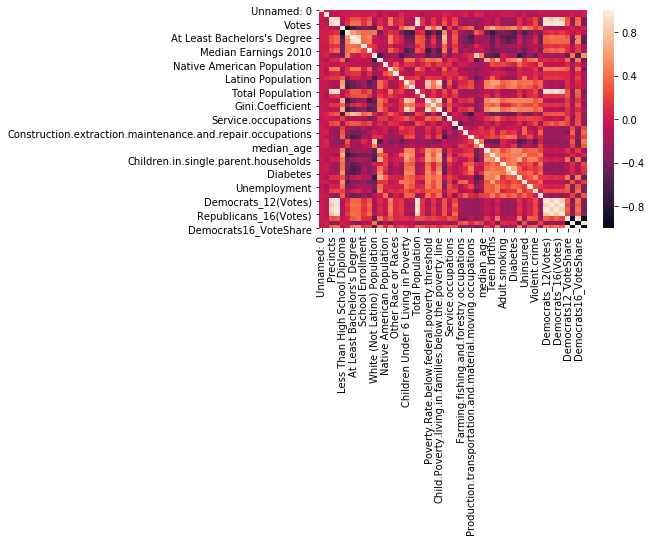

In [14]:
import seaborn as sns
sns.heatmap(data_vote.corr())



In [83]:
data_vote.corr().style.background_gradient(axis=1)

In [15]:
data_vote.corrwith(data_vote['Republicans16_VoteShare'])

Unnamed: 0                                                    0.006771
Fips                                                          0.051304
Precincts                                                    -0.330111
Votes                                                        -0.395448
Less Than High School Diploma                                 0.058951
At Least High School Diploma                                 -0.054349
At Least Bachelors's Degree                                  -0.464169
Graduate Degree                                              -0.517054
School Enrollment                                            -0.167999
Median Earnings 2010                                         -0.192509
White (Not Latino) Population                                 0.552828
African American Population                                  -0.461468
Native American Population                                   -0.065390
Asian American Population                                    -0.394287
Other 

In [16]:
stats.ttest_ind(data_vote['Republicans12_VoteShare'], data_vote['Republicans16_VoteShare'])

Ttest_indResult(statistic=-15.251111207856784, pvalue=1.348580485251551e-51)

In [17]:
summary=lm.summary()
coefficient_df=pd.DataFrame(data=summary.tables[1].data[1:], columns=summary.tables[1].data[0])
coefficient_df['coef'] = coefficient_df['coef'].astype(float)
coefficient_df.sort_values(by = 'coef', ascending = False)

,,coef,std err,t,P>|t|,[0.025,0.975]
34,Diabetes,86.421000,11.880,7.274,0.000,63.127,109.715
36,Uninsured,81.820500,4.224,19.372,0.000,73.539,90.102
29,Low.birthweight,57.012300,10.826,5.266,0.000,35.786,78.239
19,Gini.Coefficient,12.078800,5.331,2.266,0.024,1.627,22.531
33,Adult.obesity,3.508200,5.734,0.612,0.541,-7.735,14.751
21,Management.professional.and.related.occupations,1.910700,2.549,0.750,0.454,-3.087,6.908
25,Construction.extraction.maintenance.and.repair...,1.701100,2.548,0.668,0.505,-3.296,6.698
24,Farming.fishing.and.forestry.occupations,1.694100,2.549,0.665,0.506,-3.304,6.692
23,Sales.and.office.occupations,1.590300,2.548,0.624,0.533,-3.405,6.586
26,Production.transportation.and.material.moving....,1.463000,2.549,0.574,0.566,-3.534,6.460


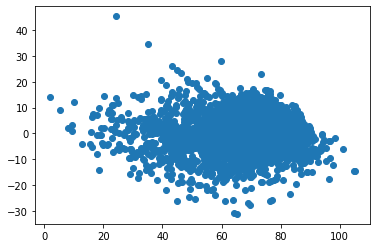

In [18]:
plt.scatter(lm.fittedvalues, lm.resid)

In [21]:
X = data_vote
y = data_vote['Republicans12_VoteShare']

corr = np.corrcoef(X,y)[0,1]

tval = corr * np.sqrt((len(X)-2)/(1- corr **2))
print(tval)

p = stats.t.sf(tval, len(X)-2)*2 #two tailed!
print(p)

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [ ]:
stats.pearsonr(data_vote, data_vote['Republicans12_VoteShare'])